In [1]:
import qiskit

In [2]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to c:\users\anirudh\appdata\local\temp\pip-req-build-919n69jo
Note: you may need to restart the kernel to use updated packages.
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17001 sha256=6628910632f22de92a9cb92070b1a9bf2d7b7ea8a3eb71b67108d99236c04388
  Stored in directory: C:\Users\ANIRUDH\AppData\Local\Temp\pip-ephem-wheel-cache-_lfnrsbv\wheels\80\c4\dd\b7ea1ee2a7247e8997db78bc777bbe22e61ab1e5ed1c4b46e1
Successfully built qiskit-textbook


In [3]:
from qiskit_textbook.widgets import bv_widget
bv_widget(2, "11")

HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x00\xcc\x08\x06\x00\x00\x00;\xd7\x9c…

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

In [5]:
n = 3
s = '011'

In [6]:
bv_circuit = QuantumCircuit(n+1, n)
bv_circuit.h(n)
bv_circuit.z(n)
for i in range(n):
    bv_circuit.h(i)
bv_circuit.h(i)
bv_circuit.barrier()
s = s[::-1]
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
bv_circuit.barrier()
for i in range(n):
    bv_circuit.h(i)
for i in range(n):
    bv_circuit.measure(i, i)
bv_circuit.draw()

┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├──────
     ├───┤      ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼─────────■───░─┤ H ├─╫─┤M├───
     ├───┤┌───┐ ░   │  ┌───┐  │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─░───┼──┤ I ├──┼───░─┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐└───┘┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘     └───┘ ░       ║  ║  ║ 
c: 3/═════════════════════════════════════╩══╩══╩═
                                          0  1  2

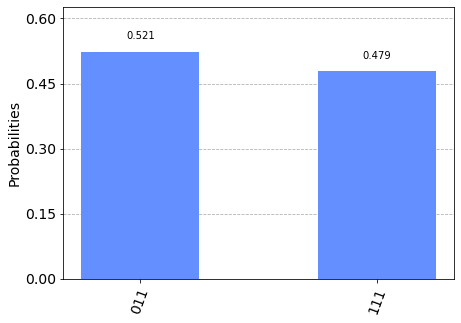

In [8]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024 
results = execute(bv_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)